<a href="https://colab.research.google.com/github/vishre/Exploratory-data-analysis-on-geolocational-data/blob/main/Exploratory_data_analysis_on_geolocational_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
#from IPython.display import Image 
#from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("All packages imported!")

All packages imported!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfstudents=pd.read_csv('/content/drive/MyDrive/food_coded.csv')

In [ ]:
dfstudents.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
dfclean=dfstudents[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
dfclean.dropna(axis=0,inplace=True)
dfclean.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


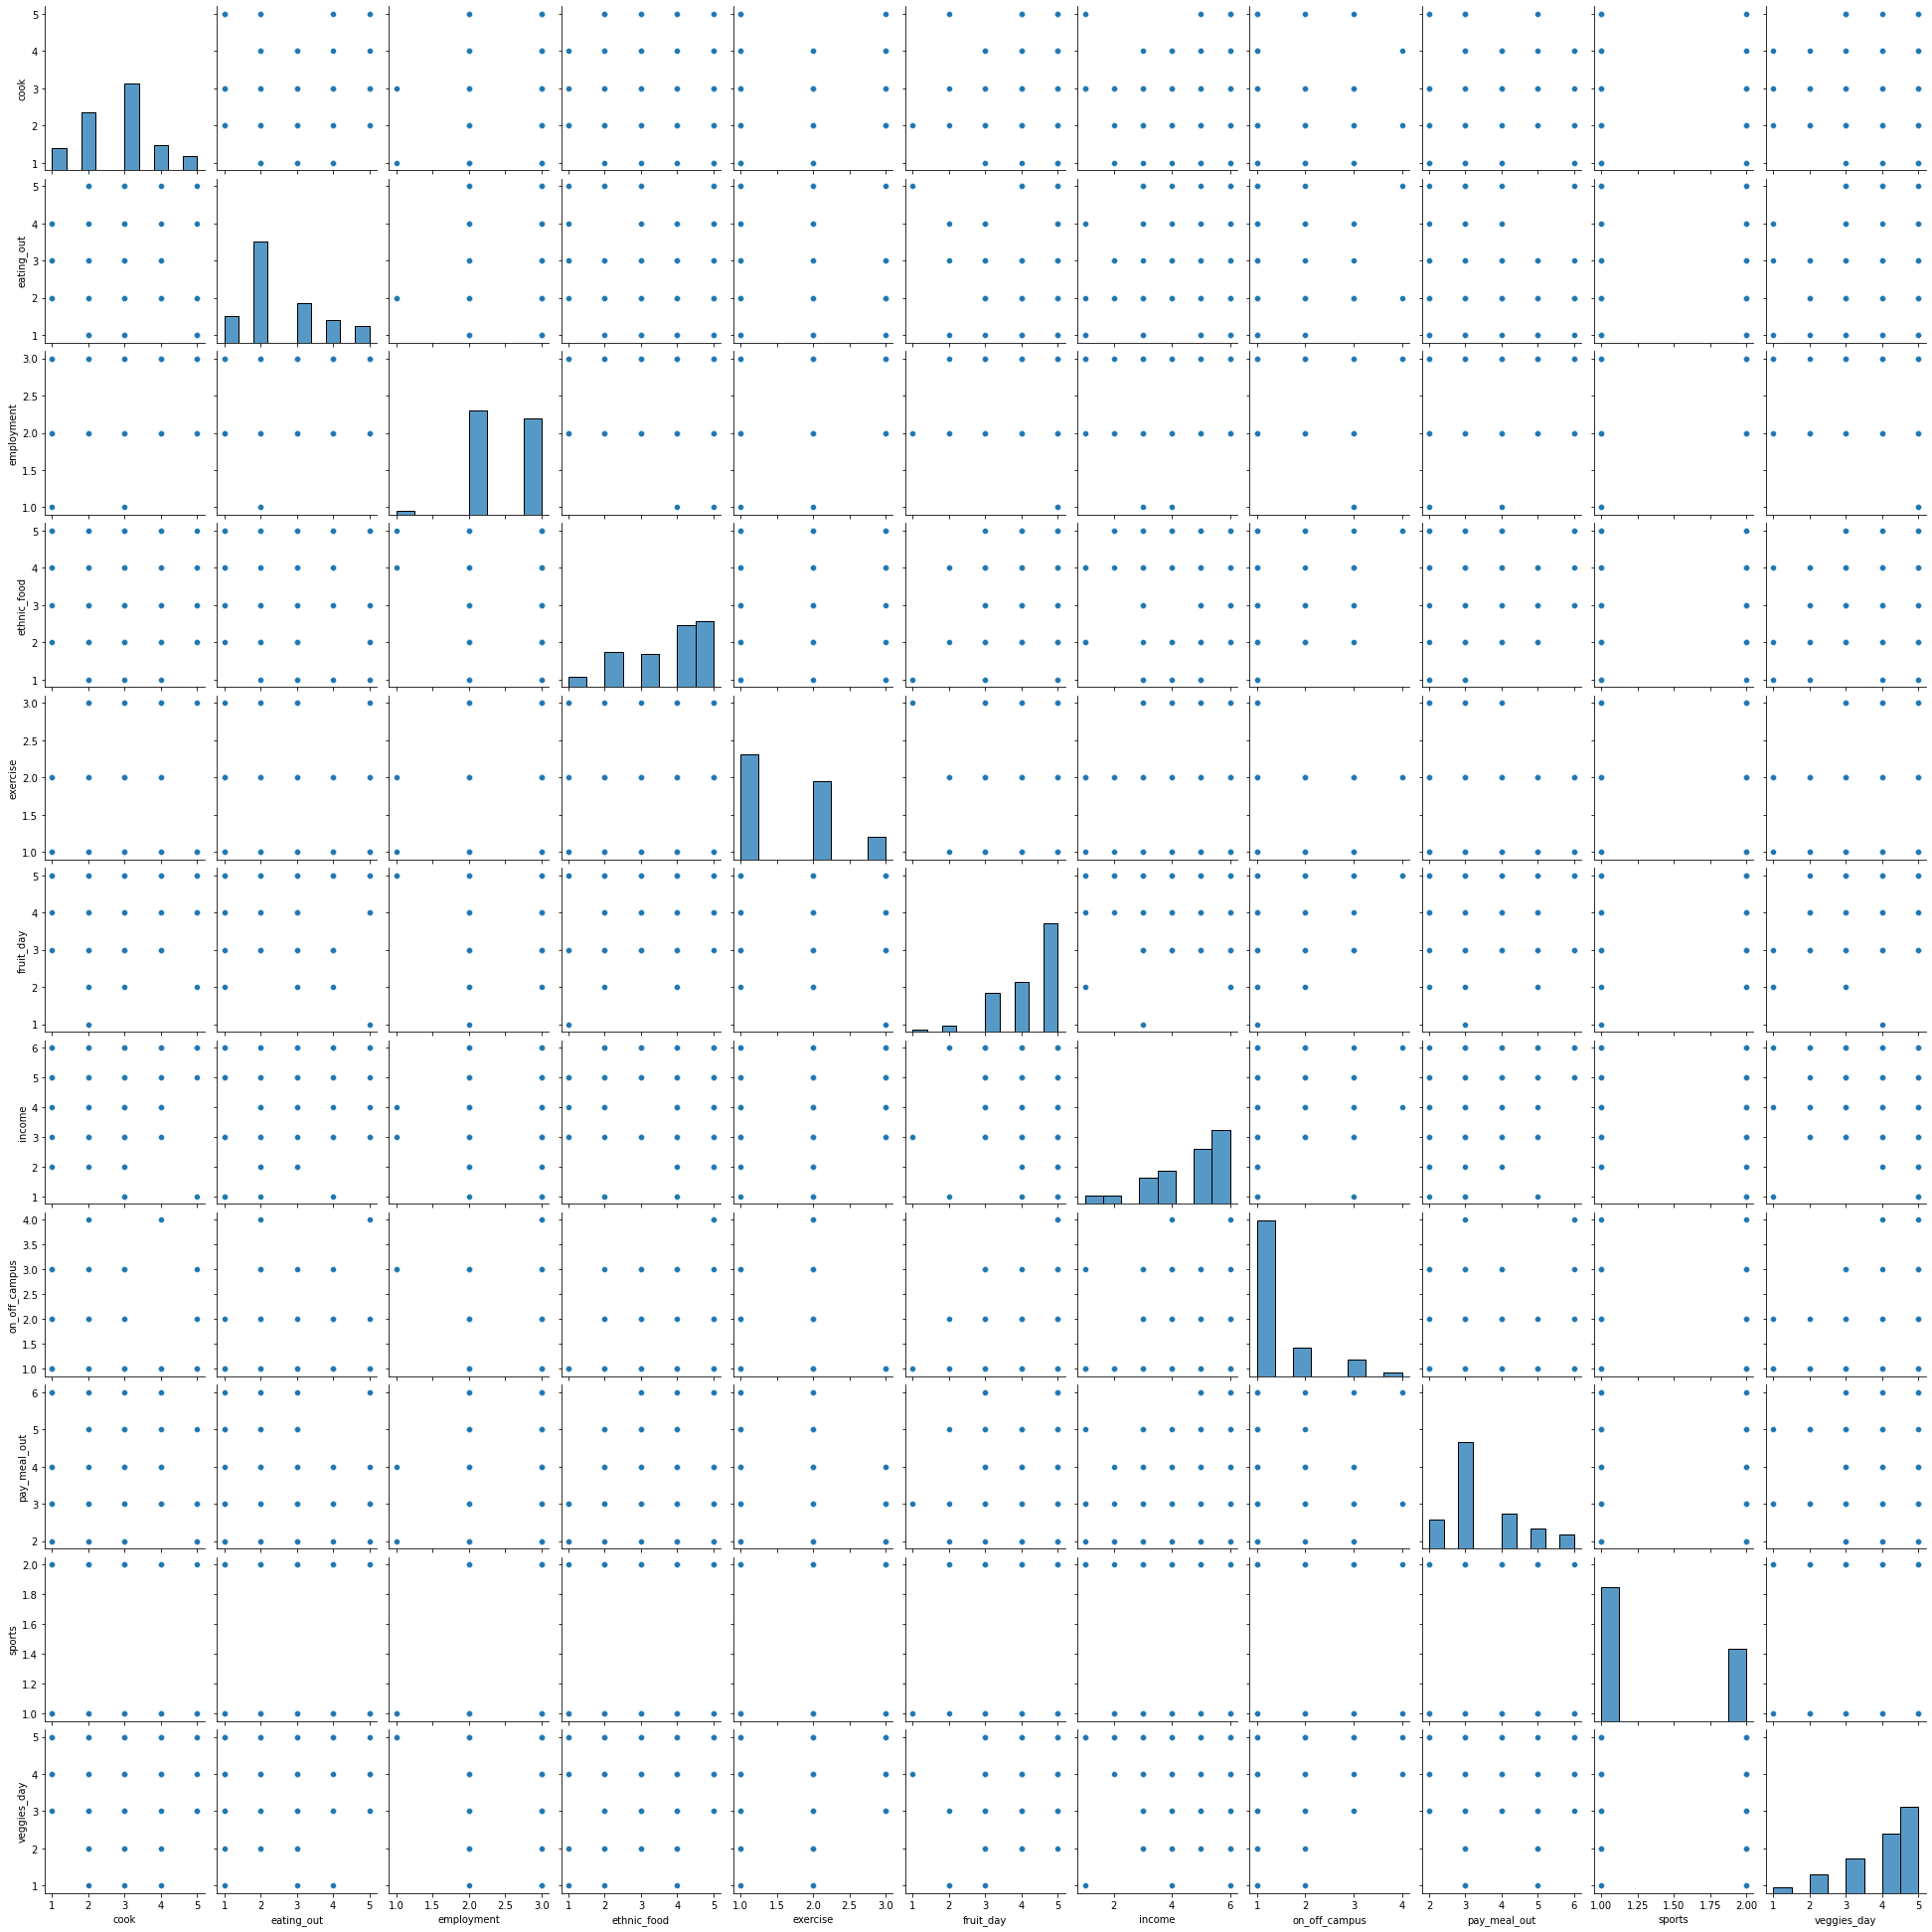

In [ ]:
import seaborn as sns
sns.pairplot(dfclean)

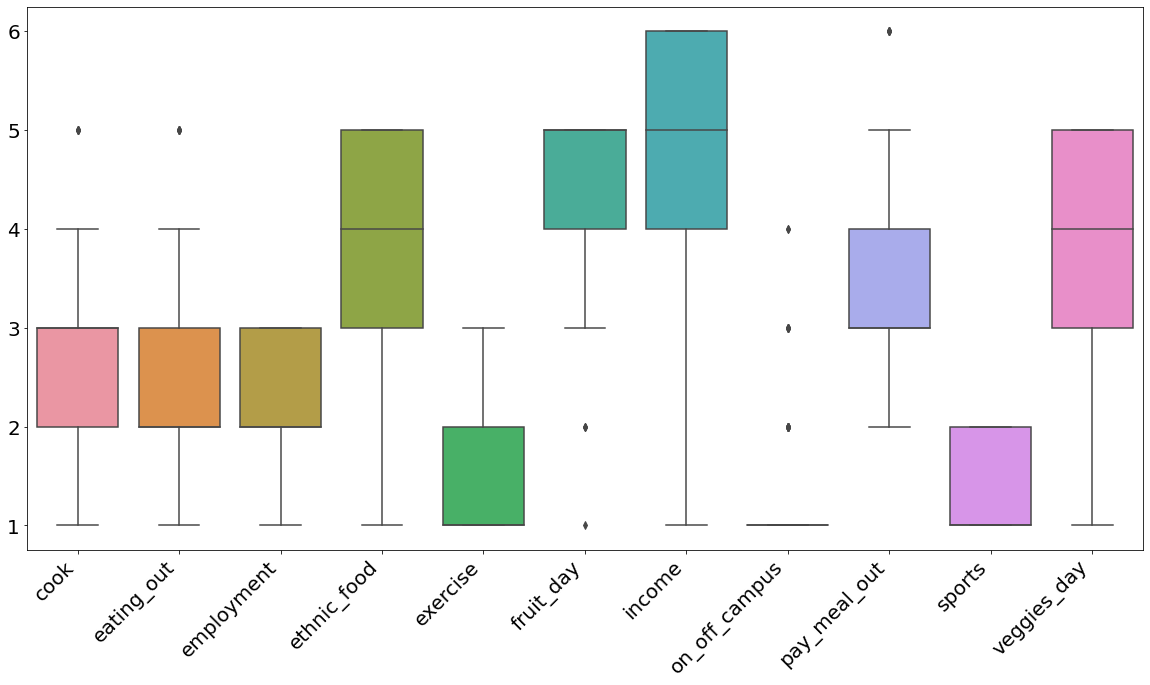

In [ ]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = dfclean)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

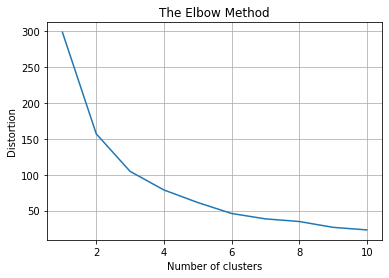

In [ ]:
f=['cook','income']
X = dfclean[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.grid(True)
plt.show()

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfclean)
dfclean['Cluster']=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


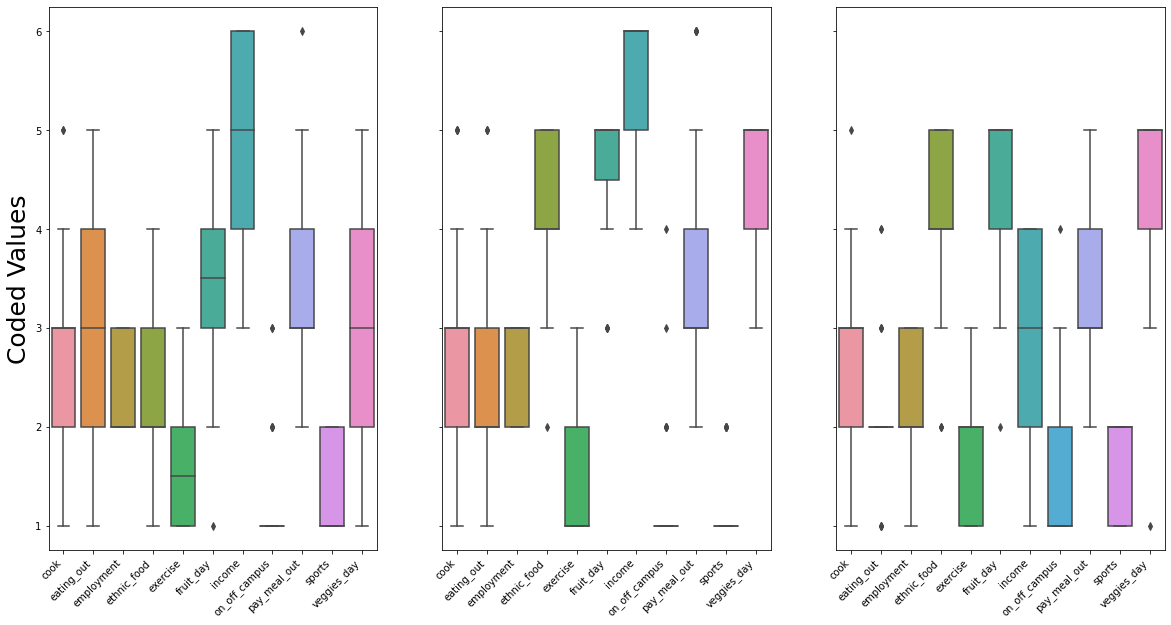

In [ ]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

In [ ]:
search_query = 'Apartment' #Search for residential locations
radius = 18000 #Set the radius to 18 kilometres due to traffic constraints
latitude=13.011624#College location
longitude=80.234697

In [ ]:
CLIENT_ID = '5O2OQN1HOFBER5CQ4VJSEBU3PZ54Z3T31EGTNFJ0V04KSKZI'
CLIENT_SECRET = 'H2KIZ3QZRGZD2GVCOSSTL04SQ3N0Y5QWEWQKPQ1VTPQNF24R' 
VERSION = '20180604'
LIMIT = 500

In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.city,location.state
0,51bb4731498e79e3b04c3d59,Apartment,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1654488121,False,The Park Hyatt,13.009774,80.220027,"[{'label': 'display', 'lat': 13.00977410383588...",1604,IN,India,"[The Park Hyatt, India]",NaN,NaN,NaN,NaN
1,4dfd74ab227185f38b98a592,Ficus Grove Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1654488121,False,"72, M.R.C Nagar Main Rad",13.019830,80.272997,"[{'label': 'display', 'lat': 13.01983021086314...",4253,IN,India,"[72, M.R.C Nagar Main Rad (R.A. Puram), Chenna...",R.A. Puram,600 028,Chennai,Tamil Nadu
2,4defacdb52b1d9bad3c500d2,NFL's Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1654488121,False,"4th Main Rd, Kasturba Nagar, Adyar",13.004583,80.251305,"[{'label': 'display', 'lat': 13.0045832, 'lng'...",1964,IN,India,"[4th Main Rd, Kasturba Nagar, Adyar, Chennai, ...",NaN,NaN,Chennai,Tamil Nadu
3,54ea9c60498e2c090a1cea5c,Senna Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1654488121,False,NaN,13.021061,80.217049,"[{'label': 'display', 'lat': 13.02106094360351...",2183,IN,India,[India],NaN,NaN,NaN,NaN
4,5798f6db498e83026abbd672,Euphoria Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1654488121,False,NaN,12.936379,80.202414,"[{'label': 'display', 'lat': 12.936379, 'lng':...",9078,IN,India,"[3rd Cross street, Chennai 600100, Tamil Nadu,...",3rd Cross street,600100,Chennai,Tamil Nadu


In [ ]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True)
dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,crossStreet,postalCode,id
0,Apartment,Restaurant,The Park Hyatt,13.009774,80.220027,"[{'label': 'display', 'lat': 13.00977410383588...",1604,"[The Park Hyatt, India]",NaN,NaN,51bb4731498e79e3b04c3d59
1,Ficus Grove Apartment,Residential Building (Apartment / Condo),"72, M.R.C Nagar Main Rad",13.019830,80.272997,"[{'label': 'display', 'lat': 13.01983021086314...",4253,"[72, M.R.C Nagar Main Rad (R.A. Puram), Chenna...",R.A. Puram,600 028,4dfd74ab227185f38b98a592
2,NFL's Apartment,Residential Building (Apartment / Condo),"4th Main Rd, Kasturba Nagar, Adyar",13.004583,80.251305,"[{'label': 'display', 'lat': 13.0045832, 'lng'...",1964,"[4th Main Rd, Kasturba Nagar, Adyar, Chennai, ...",NaN,NaN,4defacdb52b1d9bad3c500d2
3,Senna Apartment,Residential Building (Apartment / Condo),NaN,13.021061,80.217049,"[{'label': 'display', 'lat': 13.02106094360351...",2183,[India],NaN,NaN,54ea9c60498e2c090a1cea5c
4,Euphoria Apartment,Residential Building (Apartment / Condo),NaN,12.936379,80.202414,"[{'label': 'display', 'lat': 12.936379, 'lng':...",9078,"[3rd Cross street, Chennai 600100, Tamil Nadu,...",3rd Cross street,600100,5798f6db498e83026abbd672


In [ ]:
map_bang=folium.Map(location=[13.011624,80.234697],zoom_start=12)

locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

In [ ]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [ ]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Restaurants']=RestList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,13.009774,80.220027,49,47,0
1,13.019830,80.272997,46,40,2
2,13.004583,80.251305,46,42,2
3,13.021061,80.217049,48,49,0
4,12.936379,80.202414,48,18,1
5,12.995446,80.255680,47,43,2
6,13.035335,80.236748,48,50,0
7,13.030906,80.258908,45,49,0
8,12.983294,80.221405,46,40,2
9,13.030500,80.209830,48,50,0


In [ ]:
#define coordinates of the college 13.011624
map_bang=folium.Map(location=[13.011624,80.234697],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang
   